In [7]:
!move C:\Users\cbnul\Downloads\fruits_300.npy

        1개 파일을 이동했습니다.


In [12]:
import numpy as np

fruits = np.load('fruits_300.npy')   # 파일 불러오기

fruits_2d = fruits.reshape(300, 100 * 100)   # 300(과일 개수) X 100(행 픽셀) X 100(열 픽셀)

print(fruits.shape)
print(fruits_2d.shape)

(300, 100, 100)
(300, 10000)


In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)   # n_clusters : 몇 개로 분류할 것인지 정해줘야 함
                                             #               (apple, pineapple, banana))
km.fit(fruits_2d)   # 훈련

KMeans(n_clusters=3, random_state=42)

In [14]:
print(km.labels_)   # label : 속성(과일 종류)를 뜻함

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [15]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


##### 속성0에 111개, 속성1에 98개, 속성2에 91개의 샘플을 분류했다는 뜻

In [29]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):   # 과일 plot 메소드
    n = len(arr)   # n :배열의 길이
    rows = int(np.ceil(n/10))   # rows : 배열의 길이 / 10 의 올림 함수
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze=False)
    
    for i in range(rows):   # 행
        for j in range(cols):   # 열
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='rainbow')
            axs[i,j].axis('off')
    plt.show()

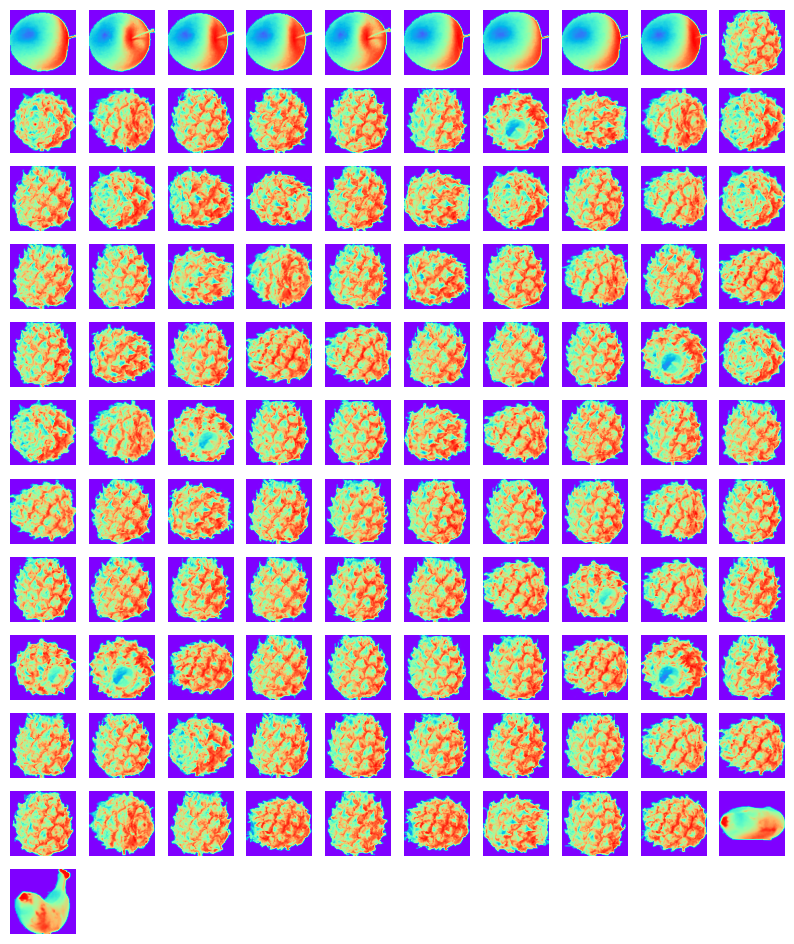

In [30]:
draw_fruits(fruits[km.labels_ == 0])

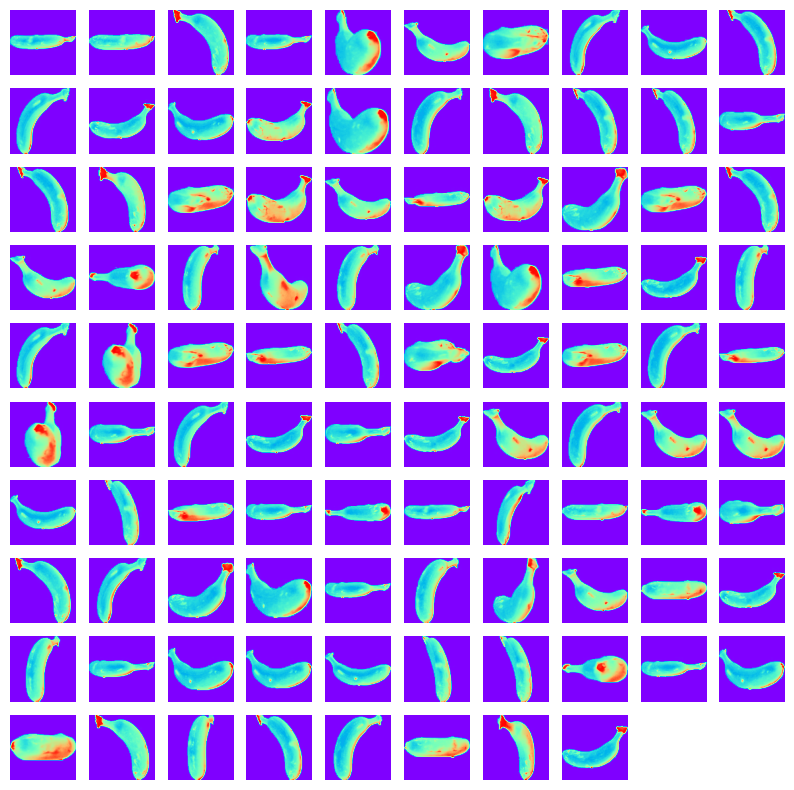

In [27]:
draw_fruits(fruits[km.labels_ == 1])

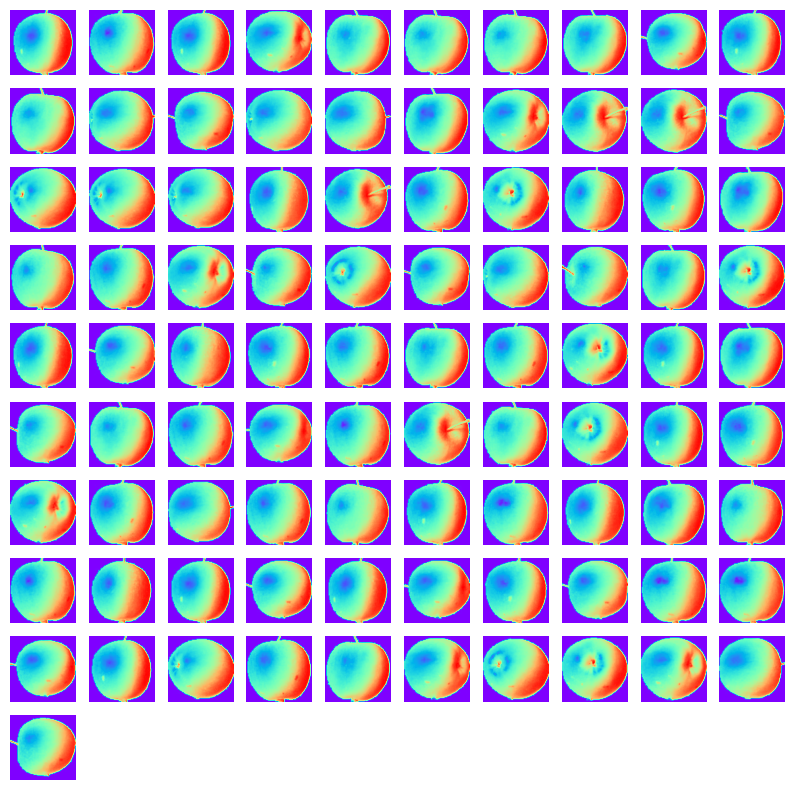

In [28]:
draw_fruits(fruits[km.labels_ == 2])

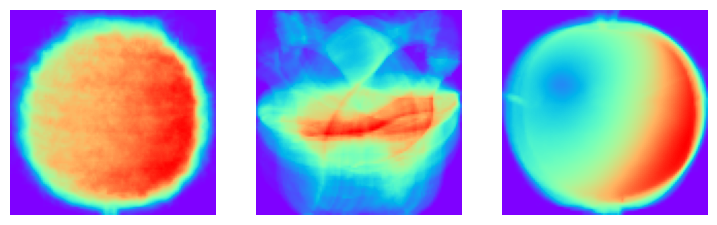

In [34]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio = 3)

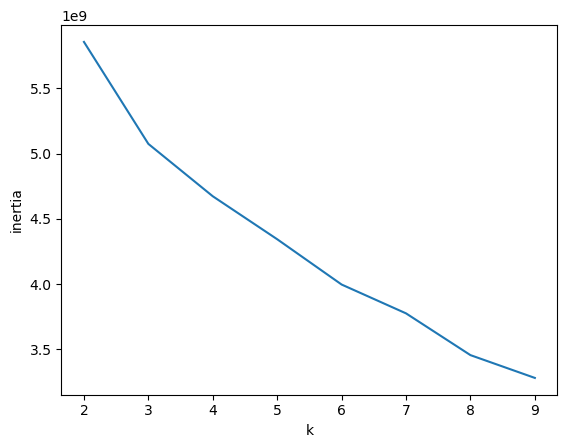

In [40]:
inertia = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
    
plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()